In [7]:
import yfinance as yf
import pandas as pd

# Load the CSV file containing the tickers
csv_file_path = 'pennies.csv'  # Adjust the path if necessary
tickers_df = pd.read_csv(csv_file_path)

In [8]:
# Load the CSV file containing the tickers
csv_file_path = 'pennies.csv'  # Adjust the path if necessary
tickers_df = pd.read_csv(csv_file_path)

# Assuming the column with tickers is named 'Ticker'
tickers = tickers_df['Ticker'].tolist()

# Check for any missing tickers
tickers = [ticker for ticker in tickers if pd.notnull(ticker)]

# Fetch current price data from Yahoo Finance using the tickers
data = yf.download(tickers, period='1d')

[*********************100%***********************]  10 of 10 completed


In [9]:
def streamlined_project(tickers):
    import yfinance as yf
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    # Define a function to fetch earnings data for multiple tickers
    def get_earnings_data(tickers):
        all_data = []
        for ticker in tickers:
            stock = yf.Ticker(ticker)
            data = stock.earnings_dates
            # Add a column for the ticker to differentiate data
            data['Ticker'] = ticker
            all_data.append(data)
        # Concatenate all data into a single DataFrame
        combined_data = pd.concat(all_data)
        return combined_data

    # Fetch earnings data for provided tickers
    earnings_data = get_earnings_data(tickers)

    # Identify reported EPS rows
    reported_eps_rows = earnings_data[earnings_data['Reported EPS'].notna()]

    # Identify the most recent unreported EPS row (where Reported EPS is NaN)
    unreported_eps_rows = earnings_data[earnings_data['Reported EPS'].isna()]
    most_recent_unreported = unreported_eps_rows.head(1)

    # Concatenate reported EPS rows with the most recent unreported EPS row
    result = pd.concat([reported_eps_rows, most_recent_unreported])
    print(result)

    # Filter rows where "EPS Estimate" is not NaN
    df_with_estimate = unreported_eps_rows[unreported_eps_rows['EPS Estimate'].notna()]

    # Function to apply a black theme to the plot
    def set_black_background(ax, fig):
        fig.patch.set_facecolor('black')
        ax.set_facecolor('black')
        plt.title("Earnings Dates on Calendar", color='white')
        plt.xlabel("Date", color='white')
        ax.tick_params(axis='x', colors='white')
        plt.xticks(rotation=45)
        plt.yticks([])  # Hide the y-axis as it’s not necessary
        return ax

    # Function to plot earnings dates on a calendar
    def plot_earnings_dates(df):
        fig, ax = plt.subplots(figsize=(10, 6))

        # Set the black background using the function
        ax = set_black_background(ax, fig)

        # Plot each point with corresponding labels (tickers)
        for idx, row in df.iterrows():
            ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-')

        # Format the x-axis as dates
        ax.xaxis.set_major_locator(mdates.WeekdayLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

        # Add legend without pre-assigned colors
        handles, labels = ax.get_legend_handles_labels()
        unique_labels = dict(zip(labels, handles))

        # Customizing the legend for a black background
        legend = ax.legend(unique_labels.values(), unique_labels.keys(), title="Ticker", facecolor='black', edgecolor='white', title_fontsize='large')
        plt.setp(legend.get_texts(), color='white')  # Set the legend text color to white
        plt.setp(legend.get_title(), color='white')  # Set the legend title color to white

        # Show the plot
        plt.tight_layout()
        plt.show()

    # Plot earnings dates
    plot_earnings_dates(df_with_estimate)

                           EPS Estimate  Reported EPS  Surprise(%) Ticker
Earnings Date                                                            
2024-07-31 08:00:00-04:00          1.02          1.13       0.1046    ASC
2024-05-08 08:00:00-04:00          0.83          0.92       0.1034    ASC
2024-02-15 08:00:00-05:00          0.62          0.63       0.0099    ASC
2023-11-07 08:00:00-05:00          0.44          0.49       0.1172    ASC
2023-08-01 08:00:00-04:00          0.56          0.57       0.0215    ASC
2023-05-09 08:00:00-04:00          1.00          1.04       0.0348    ASC
2023-02-14 08:00:00-05:00          1.24          1.30       0.0456    ASC
2022-11-02 08:00:00-04:00          1.43          1.54       0.0771    ASC
2022-07-27 08:00:00-04:00          0.68          0.81       0.1881    ASC
2022-05-04 08:00:00-04:00         -0.15         -0.03       0.7945    ASC
2022-02-15 08:00:00-05:00         -0.24         -0.26      -0.0911    ASC
2021-11-10 08:00:00-05:00         -0.3

C:\Users\nilee\AppData\Local\Temp\ipykernel_21972\999027731.py:57: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-')
C:\Users\nilee\AppData\Local\Temp\ipykernel_21972\999027731.py:57: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-')


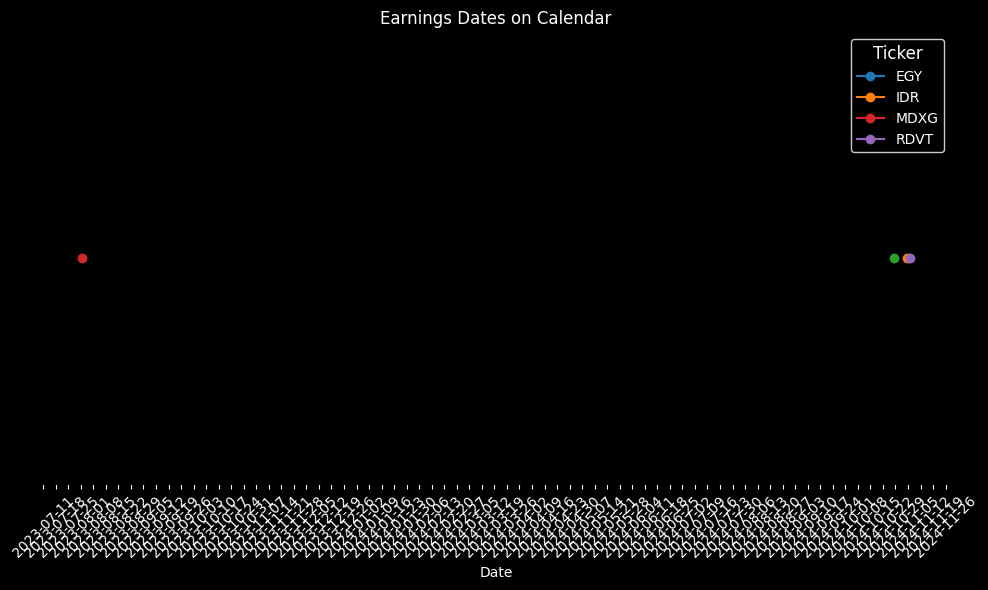

In [10]:
streamlined_project(["ASC", "AXR", "CHCI", "EGY", "GAMB", "IDR", "MDXG", "OPXS", "RDVT"])

                           EPS Estimate  Reported EPS  Surprise(%) Ticker
Earnings Date                                                            
2024-07-16 06:00:00-04:00          2.98          3.30       0.1063    PNC
2024-04-16 06:00:00-04:00          3.01          3.36       0.1167    PNC
2024-01-16 06:00:00-05:00          2.94          3.16       0.0737    PNC
2023-10-13 06:00:00-04:00          3.11          3.60       0.1586    PNC
2023-07-18 07:00:00-04:00          3.28          3.36       0.0230    PNC
2023-04-14 06:00:00-04:00          3.67          3.98       0.0847    PNC
2024-07-17 06:00:00-04:00          0.79          0.78      -0.0067    CFG
2024-04-17 06:00:00-04:00          0.74          0.65      -0.1184    CFG
2024-01-17 06:00:00-05:00          0.71          0.34      -0.5242    CFG
2023-10-18 09:00:00-04:00          0.91          0.85      -0.0613    CFG
2023-07-19 06:00:00-04:00          1.01          0.92      -0.0861    CFG
2023-04-19 06:00:00-04:00          1.1

C:\Users\nilee\AppData\Local\Temp\ipykernel_21972\999027731.py:57: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-')
C:\Users\nilee\AppData\Local\Temp\ipykernel_21972\999027731.py:57: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-')


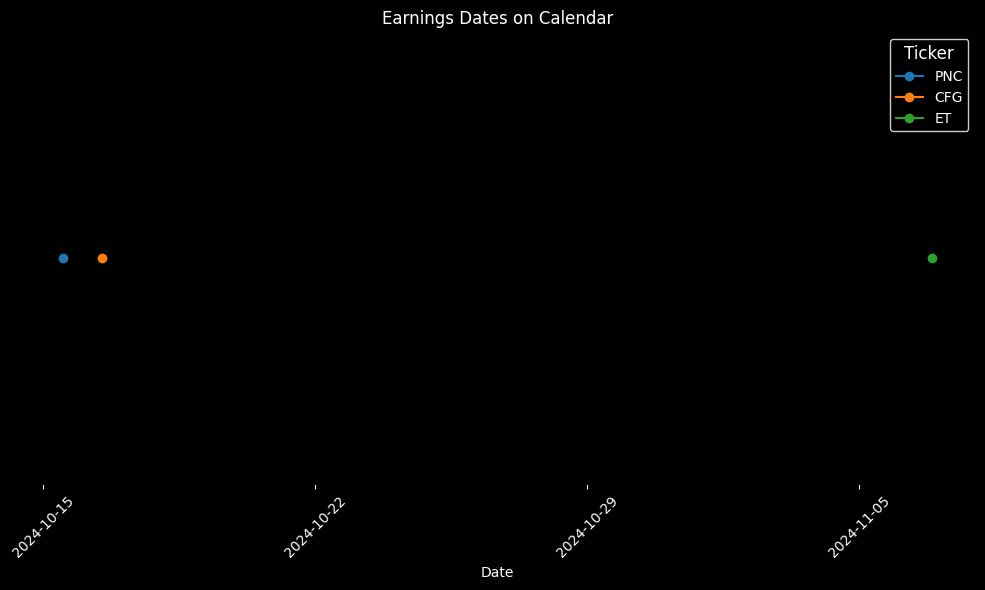

In [11]:
streamlined_project(["PNC", "CFG", "ET"])